# Importando Bibliotecas e CSV

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from wordcloud import WordCloud

In [ ]:
dfCustomers = pd.read_csv('/content/customers.csv', sep=';')
dfSuppliers = pd.read_csv('/content/suppliers.csv', sep=';')
dfOrders = pd.read_csv('/content/orders.csv', sep=';')
dfOrder_details = pd.read_csv('/content/order_details.csv', sep=';')
dfProducts = pd.read_csv('/content/products.csv', sep=';')

# Distribuição de Clientes por País

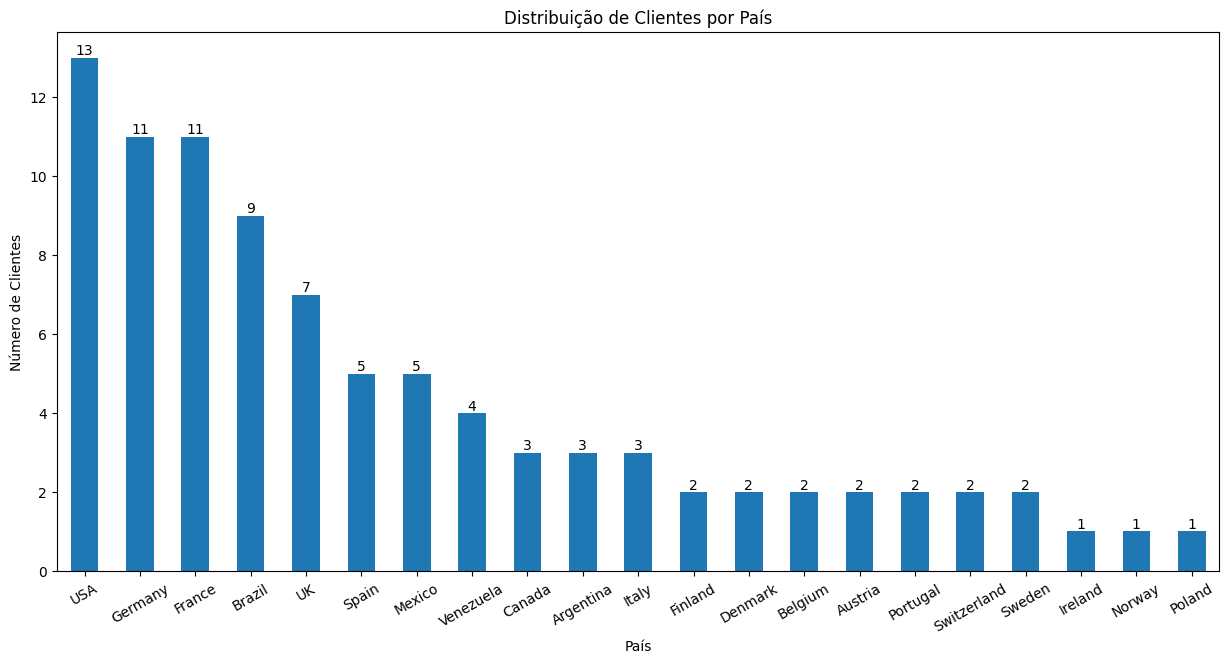

In [ ]:
customerDist = dfCustomers['country'].value_counts()

plt.figure(figsize=(15, 7))

axis = customerDist.plot(kind='bar')
for x, y in enumerate(customerDist):
    axis.text(x, y, str(y), ha='center', va='bottom')

plt.xlabel('País')
plt.ylabel('Número de Clientes')
plt.title('Distribuição de Clientes por País')
plt.xticks(rotation=30)

plt.show()

# Distribuição de Fornecedores por País

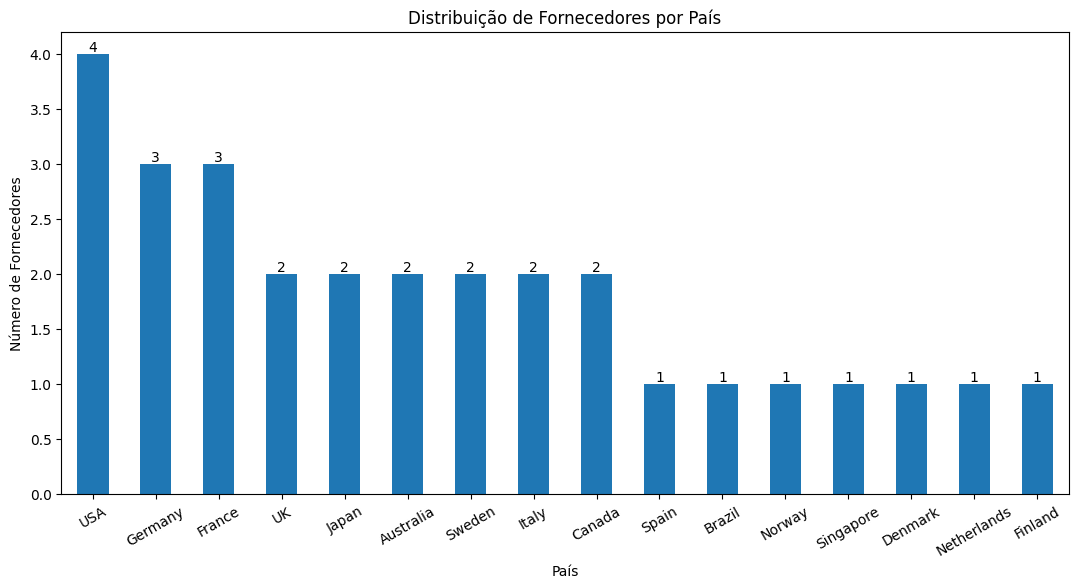

In [ ]:
supplierDist = dfSuppliers['country'].value_counts()

plt.figure(figsize=(13, 6))

axis = supplierDist.plot(kind='bar')
for x, y in enumerate(supplierDist):
    axis.text(x, y, str(y), ha='center', va='bottom')

plt.xlabel('País')
plt.ylabel('Número de Fornecedores')
plt.title('Distribuição de Fornecedores por País')
plt.xticks(rotation=30)

plt.show()

In [ ]:
paises_sem_fornecedores = [pais for pais in dfCustomers['country'].unique() if pais not in dfSuppliers['country'].unique()]
paises_sem_fornecedores

['Mexico',
 'Argentina',
 'Switzerland',
 'Austria',
 'Portugal',
 'Venezuela',
 'Ireland',
 'Belgium',
 'Poland']

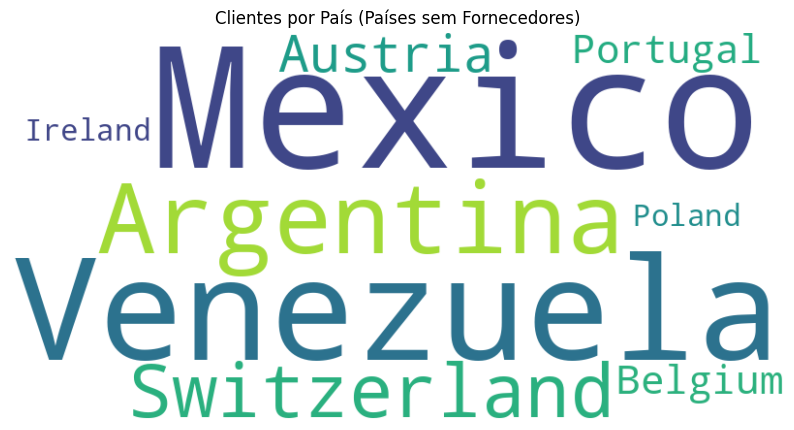

In [ ]:
clientes_por_pais = {}
for pais in paises_sem_fornecedores:
    clientes_por_pais[pais] = customerDist.get(pais, 0)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(clientes_por_pais)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Clientes por País (Países sem Fornecedores)')
plt.show()

# Faturamentos

In [ ]:
dfOrders_total = pd.merge(dfOrders, dfOrder_details, on='order_id')

dfOrders_total['total_value'] = ((dfOrders_total['unit_price'] * dfOrders_total['quantity']) - dfOrders_total['discount'])

dfOrders_total['order_date'] = pd.to_datetime(dfOrders_total['order_date'])

dfOrders_total_1996 = dfOrders_total[dfOrders_total['order_date'].dt.year == 1996]
dfOrders_total_1997 = dfOrders_total[dfOrders_total['order_date'].dt.year == 1997]
dfOrders_total_1998 = dfOrders_total[dfOrders_total['order_date'].dt.year == 1998]

faturamento_1996 = dfOrders_total_1996.groupby(dfOrders_total['order_date'].dt.month)['total_value'].sum()
faturamento_1997 = dfOrders_total_1997.groupby(dfOrders_total['order_date'].dt.month)['total_value'].sum()
faturamento_1998 = dfOrders_total_1998.groupby(dfOrders_total['order_date'].dt.month)['total_value'].sum()

In [ ]:
faturamento_1996

order_date
7     30188.4
8     26606.7
9     27634.6
10    41198.8
11    49701.1
12    50947.4
Name: total_value, dtype: float64

In [ ]:
faturamento_1997

order_date
1     66687.25
2     41201.65
3     39976.25
4     55695.24
5     56818.65
6     39083.80
7     55459.93
8     49976.84
9     59727.22
10    70322.30
11    45909.06
12    77467.76
Name: total_value, dtype: float64

In [ ]:
faturamento_1998

order_date
1    100845.32
2    104556.80
3    109816.50
4    134621.06
5     19894.92
Name: total_value, dtype: float64

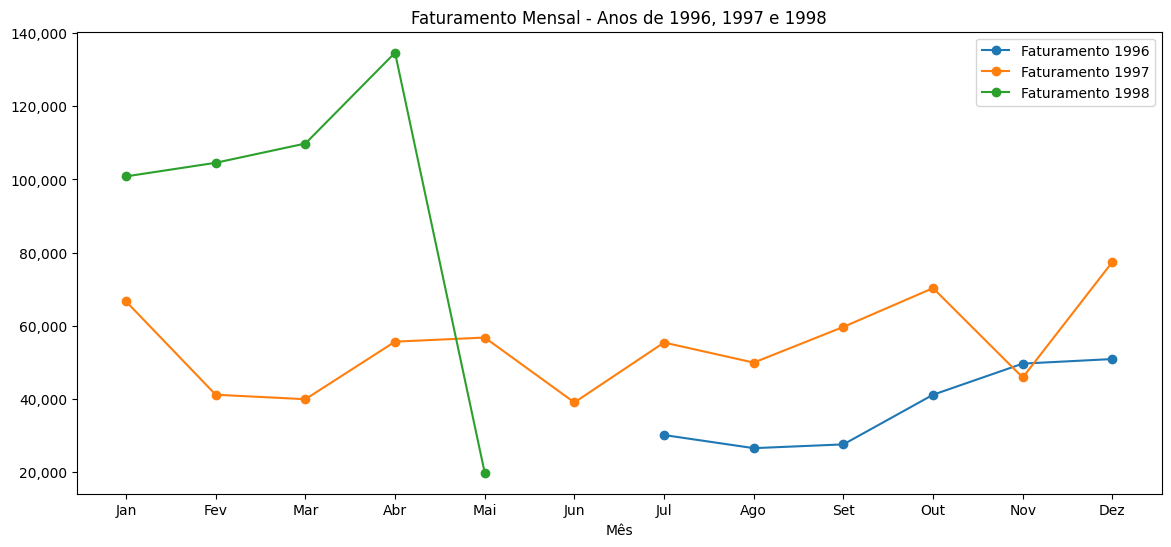

In [ ]:
def formatar(x, y):
    return '{:,.0f}'.format(x)

plt.figure(figsize=(14, 6))

plt.plot(faturamento_1996.index, faturamento_1996.values, marker='o', linestyle='-', label='Faturamento 1996')
plt.plot(faturamento_1997.index, faturamento_1997.values, marker='o', linestyle='-', label='Faturamento 1997')
plt.plot(faturamento_1998.index, faturamento_1998.values, marker='o', linestyle='-', label='Faturamento 1998')

plt.xlabel('Mês')
meses = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']
plt.xticks(range(1, 13), meses)
plt.title('Faturamento Mensal - Anos de 1996, 1997 e 1998')
plt.legend()

formatter = FuncFormatter(formatar)
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()

# Ticket Médio

In [ ]:
ticket_medio_1996 = faturamento_1996 / dfOrders_total_1996['order_date'].dt.month.value_counts().sort_index()
ticket_medio_1997 = faturamento_1997 / dfOrders_total_1997['order_date'].dt.month.value_counts().sort_index()
ticket_medio_1998 = faturamento_1998 / dfOrders_total_1998['order_date'].dt.month.value_counts().sort_index()

In [ ]:
ticket_medio_1996

order_date
7     511.667797
8     385.604348
9     484.817544
10    564.367123
11    753.046970
12    628.980247
dtype: float64

In [ ]:
ticket_medio_1997

order_date
1     784.555882
2     521.539873
3     519.172078
4     687.595556
5     591.860937
6     514.260526
7     720.258831
8     594.962381
9     628.707579
10    663.417925
11    515.832135
12    679.541754
dtype: float64

In [ ]:
ticket_medio_1998

order_date
1    663.456053
2    857.022951
3    616.946629
4    747.894778
5    337.202034
dtype: float64

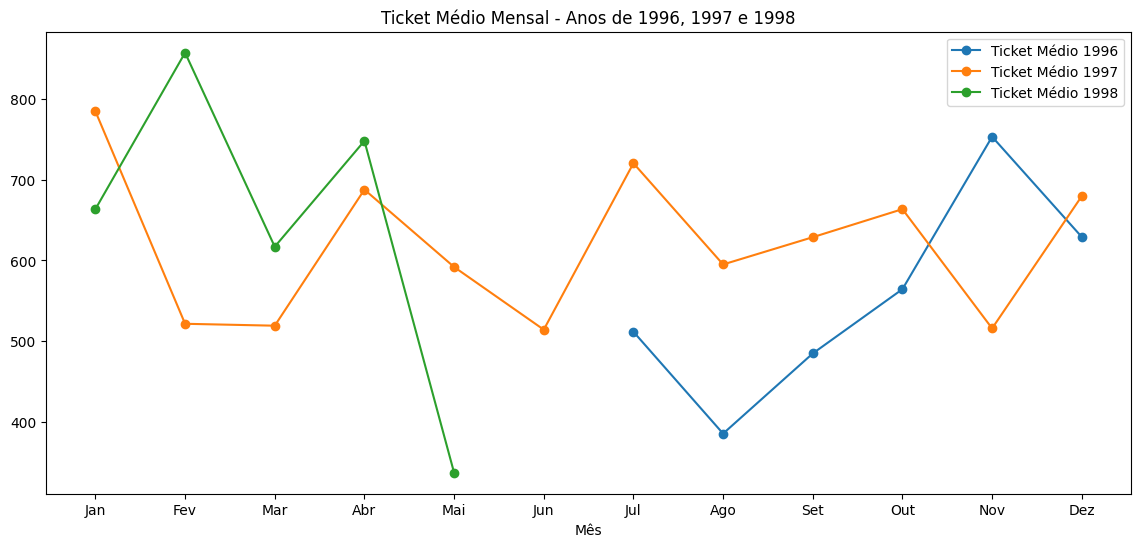

In [ ]:
def formatar(x, y):
    return '{:,.0f}'.format(x)

plt.figure(figsize=(14, 6))

plt.plot(ticket_medio_1996.index, ticket_medio_1996.values, marker='o', linestyle='-', label='Ticket Médio 1996')
plt.plot(ticket_medio_1997.index, ticket_medio_1997.values, marker='o', linestyle='-', label='Ticket Médio 1997')
plt.plot(ticket_medio_1998.index, ticket_medio_1998.values, marker='o', linestyle='-', label='Ticket Médio 1998')

plt.xlabel('Mês')
meses = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']
plt.xticks(range(1, 13), meses)
plt.title('Ticket Médio Mensal - Anos de 1996, 1997 e 1998')
plt.legend()

formatter = FuncFormatter(formatar)
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()

# Churn Rate

In [ ]:
dfOrders['order_date'] = pd.to_datetime(dfOrders['order_date'])
dfOrders['mes'] = dfOrders['order_date'].dt.month

dfOrders_1996 = dfOrders[dfOrders['order_date'].dt.year == 1996]
dfOrders_1998 = dfOrders[dfOrders['order_date'].dt.year == 1998]

In [ ]:
clientes_que_sairam1996 = dfOrders_1996[~dfOrders_1996['customer_id'].isin(dfOrders_1998['customer_id'])]
clientes_que_sairam1996 = set(clientes_que_sairam1996['customer_id'])
clientes_que_sairam1996

{'CENTC', 'FAMIA', 'GROSR', 'HUNGC', 'MEREP', 'VINET'}

In [ ]:
clientes_que_sairam1997 = dfOrders_1997[~dfOrders_1997['customer_id'].isin(dfOrders_1998['customer_id'])]
clientes_que_sairam1997 = set(clientes_que_sairam1997['customer_id'])
clientes_que_sairam1997

{'FAMIA', 'FOLIG', 'GROSR', 'HUNGC', 'LAZYK', 'MEREP', 'VINET'}

In [ ]:
clientes_que_sairam = clientes_que_sairam1996.union(clientes_que_sairam1997)
clientes_que_sairam

{'CENTC', 'FAMIA', 'FOLIG', 'GROSR', 'HUNGC', 'LAZYK', 'MEREP', 'VINET'}

In [ ]:
clientes_que_ficaram = list(set(dfOrders_1996['customer_id']) - clientes_que_sairam)
clientes_que_ficaram

['HANAR',
 'BSBEV',
 'WARTH',
 'WOLZA',
 'QUEDE',
 'BERGS',
 'RICAR',
 'HILAA',
 'TRADH',
 'SEVES',
 'SUPRD',
 'BONAP',
 'LILAS',
 'DRACD',
 'ISLAT',
 'SIMOB',
 'WELLI',
 'KOENE',
 'DUMON',
 'ROMEY',
 'AROUT',
 'MAGAA',
 'LEHMS',
 'BOLID',
 'ANATR',
 'SPLIR',
 'FOLKO',
 'TOMSP',
 'OTTIK',
 'RATTC',
 'OLDWO',
 'EASTC',
 'LONEP',
 'ERNSH',
 'PICCO',
 'SANTG',
 'PERIC',
 'HUNGO',
 'FURIB',
 'TORTU',
 'BOTTM',
 'QUICK',
 'WANDK',
 'VICTE',
 'MORGK',
 'GODOS',
 'SAVEA',
 'RICSU',
 'BLONP',
 'FRANK',
 'VAFFE',
 'REGGC',
 'LAMAI',
 'ANTON',
 'GALED',
 'THEBI',
 'QUEEN',
 'WHITC',
 'PRINI',
 'COMMI',
 'CHOPS']

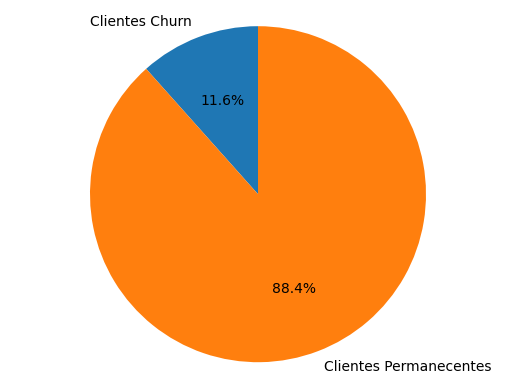

In [ ]:
rotulos = ['Clientes Churn', 'Clientes Permanecentes']

plt.pie([len(clientes_que_sairam), len(clientes_que_ficaram)], labels=rotulos, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.show()

In [ ]:
churn1996_1998 = (len(clientes_que_sairam) / len(clientes_que_ficaram)) * 100
print(f'Taxa de Churn 1996-1998: {churn1996_1998:.2f}%')

Taxa de Churn 1996-1998: 13.11%


# Produtos Mais Vendidos

In [ ]:
produtos_mais_vendidos = dfOrder_details['product_id'].value_counts().head()
nomes_produtos_mais_vendidos = dfProducts[dfProducts['product_id'].isin(produtos_mais_vendidos.index)]['product_name']

In [ ]:
soma_valores_produto = dfOrder_details.groupby('product_id')['unit_price'].sum()

produtos_mais_lucrativos = soma_valores_produto.sort_values(ascending=False).head()
nomes_produtos_mais_lucrativos = dfProducts[dfProducts['product_id'].isin(produtos_mais_lucrativos.index)]['product_name']

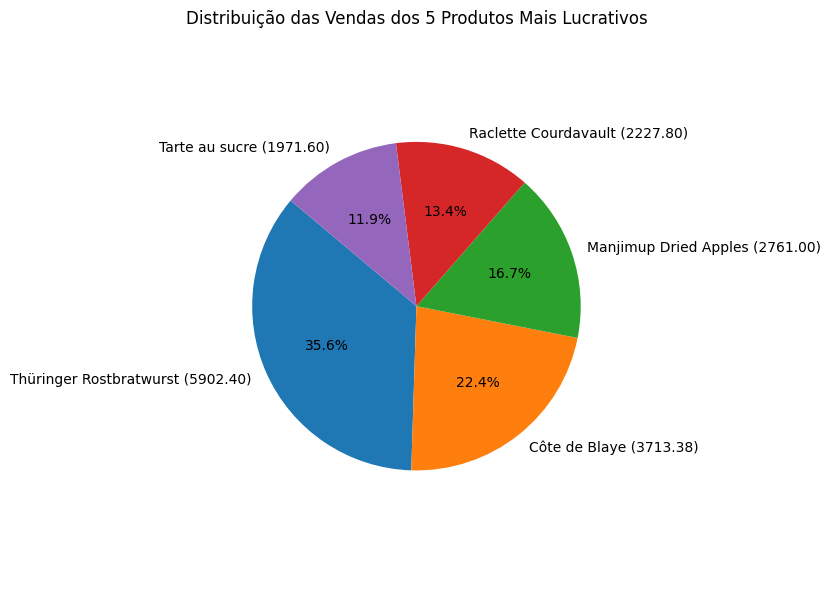

In [ ]:
plt.figure(figsize=(8, 6))
plt.pie(produtos_mais_lucrativos, labels=[f'{nome} ({valor:.2f})' for nome, valor in zip(nomes_produtos_mais_lucrativos, produtos_mais_lucrativos)], autopct='%1.1f%%', startangle=140)
plt.title('Distribuição das Vendas dos 5 Produtos Mais Lucrativos')

plt.axis('equal')
plt.tight_layout()
plt.show()

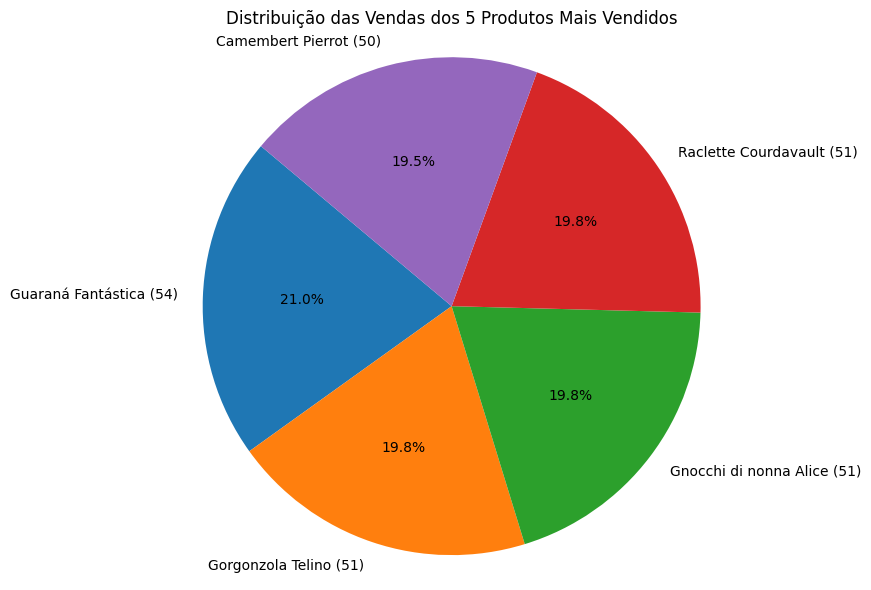

In [ ]:
plt.figure(figsize=(8, 6))
plt.pie(produtos_mais_vendidos, labels=[f'{nome} ({valor})' for nome, valor in zip(nomes_produtos_mais_vendidos, produtos_mais_vendidos)], autopct='%1.1f%%', startangle=140)
plt.title('Distribuição das Vendas dos 5 Produtos Mais Lucrativos')

plt.axis('equal')
plt.tight_layout()
plt.show()